This project is based on the dataset for the Udemy Data Analytics Project published on Medium. A member of the data team at Udemy had worked on the project with excel and visualised with PowerBI but I will be using python and PowerBI.

The scope of the project covers only four course categories: Business Finance, Graphics Design, Musical Instruments and Web Development.

The aim is to explore the number of courses for each subject area, the number of subscribers, how well the courses were rated and how much revenue is being generated etc. For each subject category, we will also identify the key words for the most best rated and most sought after courses..

**We will find answers to the following questions and more:**

    Which subject area has the highest and lowest number of published courses?
    Which subject area has the highest number of subscribers?
    What levels of courses are free?
    What words are common among the courses with high ratings and number of subscriptions?
    How well were the courses rated by subscribers?
    For each subject category, what year were most courses published?
    Which suject area contributes the most to the companies revenue?


In [3]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization using plots
import string  # For working with string operations (like removing punctuation)
import re  # For regular expressions to handle text cleaning
import nltk  # Natural Language Toolkit for text processing
from nltk.corpus import stopwords  # For removing common stopwords in text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # For generating word clouds
from datetime import datetime  # For working with date and time data
import plotly.express as px  # For creating interactive visualizations
import warnings  # To handle or suppress warnings

#load the four diferent datasets
df_biz = pd.read_csv("/content/Business Courses.csv") #Business Finance
df_gfx = pd.read_csv("/content/Design Courses.csv") #Graphics
df_mus = pd.read_csv("/content/Music Courses.csv") #Musical Instrument
df_dev = pd.read_csv("/content/Web development Courses.csv") #Web Development

#join the different dataframes
df = pd.concat([df_biz, df_gfx, df_mus, df_dev])

#sample the first rows of the dataframe
print('\n')
print("This combined dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]) )
df.head(2)



This combined dataset has 3681 rows and 12 columns


,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance


# **Data Wrangling**

In [4]:
#summary statistics of the combined dataframe
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3677.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610889,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334244,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


In [5]:
#check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3681 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 502.9+ KB


In [6]:
#check for and drop duplicates
df[df.duplicated()]

#drop duplicates in the course id column
df.drop_duplicates(subset=['course_id'],inplace=True)

In [7]:
#drop rows with missing values
df.dropna(inplace=True)

#confirm there is no more any null values
df.isnull().sum()

,0
course_id,0
course_title,0
url,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
Rating,0
content_duration,0


In [9]:
#drop unwanted columns from the combined dataframe
df = df.drop(['url','num_reviews', 'course_id', 'num_lectures','content_duration'], axis = 1)

In [8]:
#cast datatype as int
df['num_subscribers'] = df['num_subscribers'].astype('int64')


#confirm change
df.head(2)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance


In [ ]:
#categorize courses as either free or paid
conditions = [
    (df['price'] == 0),
    (df['price'] > 0)]

values  = ['free', 'paid']
df['price_group'] = np.select(conditions, values)

df['price_group'].value_counts()

,count
price_group,
paid,3362
free,310


In [10]:
#set category for ratings using a 5star system
conditions1 = [
    (df['Rating'] == 0),
    (df['Rating'] > 0) & (df['Rating'] < 0.2),
    (df['Rating'] >= 0.2) & (df['Rating'] < 0.4),
    (df['Rating'] >= 0.4) & (df['Rating'] < 0.6),
    (df['Rating'] >= 0.6) & (df['Rating'] < 0.8),
    (df['Rating'] >= 0.8)
]
values1 = [0, 1, 2, 3, 4, 5]
df['star_rating'] = np.select(conditions1, values1)

df['star_rating'].value_counts()

,count
star_rating,
5,1543
1,735
4,610
2,428
3,338
0,18


In [ ]:
#rename the levels
levels = ({'All Levels':'General', 'Beginner Level':'Beginner',
           'Intermediate Level':'Intermediate', 'Expert Level':'Expert'})
df['level'] = df['level'].replace(levels)

df['level'].value_counts()

,count
level,
General,1925
Beginner,1268
Intermediate,421
Expert,58


In [ ]:
#extract date only from datetime object
df['published'] = df['published_timestamp'].str.split('T').str[0]

df = df.drop(['published_timestamp'], axis = 1) #drop the combined timestam column

df['published']

,published
0,2013-04-20
1,2013-04-07
2,2013-12-25
3,2014-05-27
4,2016-01-21
...,...
1200,2017-05-29
1201,2017-07-06
1202,2017-06-11
1203,2017-06-15


In [ ]:
#create column for the year the course was published
df['year'] = (df['published'].str.split('-').str[0]).astype(int)
df['year'].value_counts()

,count
year,
2016,1204
2015,1014
2017,713
2014,490
2013,201
2012,45
2011,5


In [ ]:
#write regex funtion to clean text in course_title column

def clean(text):
    text = str(text).title()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove url
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[0-9]', '', text)
    text = re.sub('<.*?>+', '', text)
    return text

df['course_title'] = df['course_title'].apply(clean)

In [ ]:
#clean off punctautions from subject column

df['subject']=df['subject'].str.split(': ').str[-1].str.lstrip()
df['subject'].value_counts()

,count
subject,
Web Development,1199
Business Finance,1191
Musical Instruments,680
Graphic Design,602


In [ ]:
df['revenue'] = df['num_subscribers'] * df['price']

In [ ]:
#separate the component dataframes

df_biz = df.query('subject == "Business Finance"')
df_gfx = df.query('subject == "Graphic Design"')
df_mus = df.query('subject == "Musical Instruments"')
df_dev = df.query('subject == "Web Development"')

print('There are {} {} courses'.format(df_biz.shape[0], df_biz.subject[0]))
print('There are {} {} courses'.format(df_gfx.shape[0], df_gfx.subject[0]))
print('There are {} {} courses'.format(df_mus.shape[0], df_mus.subject[0]))
print('There are {} {} courses'.format(df_dev.shape[0], df_dev.subject[0]))


There are 1191 Business Finance courses
There are 602 Graphic Design courses
There are 680 Musical Instruments courses
There are 1199 Web Development courses


In [ ]:
#plot the course category

#extract only the subject name
df['subject'] = df['subject'].str.split(': ').str[-1]
df['subject'] = df['subject'].str.lstrip(' ')

subject = df['subject'].value_counts()

print(df['subject'].value_counts())
figure = px.pie(df,
                values = subject.values,
                names = subject.index,
                hole = 0.5)
figure.show()



subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64


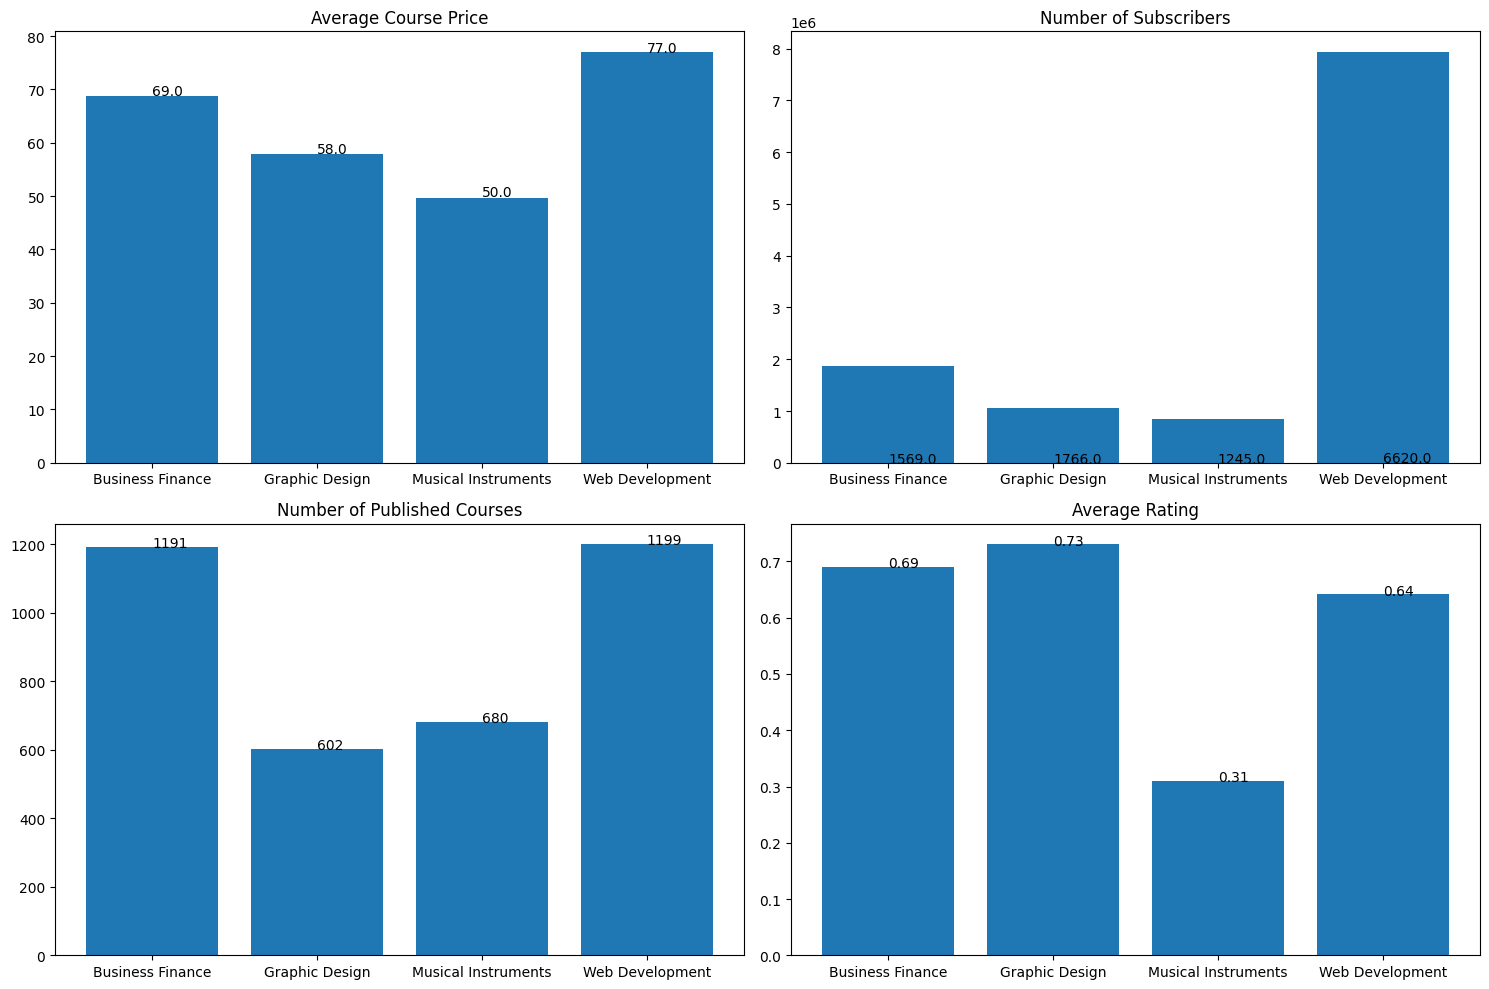

In [ ]:
#course price versus number of subscribers
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

values = df.groupby('subject')['price'].mean().round()
ax0.bar(df.groupby('subject')['price'].mean().index, df.groupby('subject')['price'].mean() )
ax0.set_title('Average Course Price')
[ax0.text(index, value, str(value)) for index, value in enumerate(values)] #list comprehension to add bar values

values = df.groupby('subject')['num_subscribers'].mean().round()
ax1.bar(df.groupby('subject')['num_subscribers'].sum().index, df.groupby('subject')['num_subscribers'].sum())
ax1.set_title('Number of Subscribers')
[ax1.text(index, value, str(value)) for index, value in enumerate(values)]

values = df.groupby('subject')['course_title'].count()
ax2.bar(df.groupby('subject')['course_title'].count().index, df.groupby('subject')['course_title'].count())
ax2.set_title('Number of Published Courses')
[ax2.text(index, value, str(value)) for index, value in enumerate(values)]

values = df.groupby('subject')['Rating'].mean().round(2)
ax3.bar(df.groupby('subject')['Rating'].mean().index, df.groupby('subject')['Rating'].mean())
ax3.set_title('Average Rating')
[ax3.text(index, value, str(value)) for index, value in enumerate(values)]

plt.tight_layout()
plt.show()

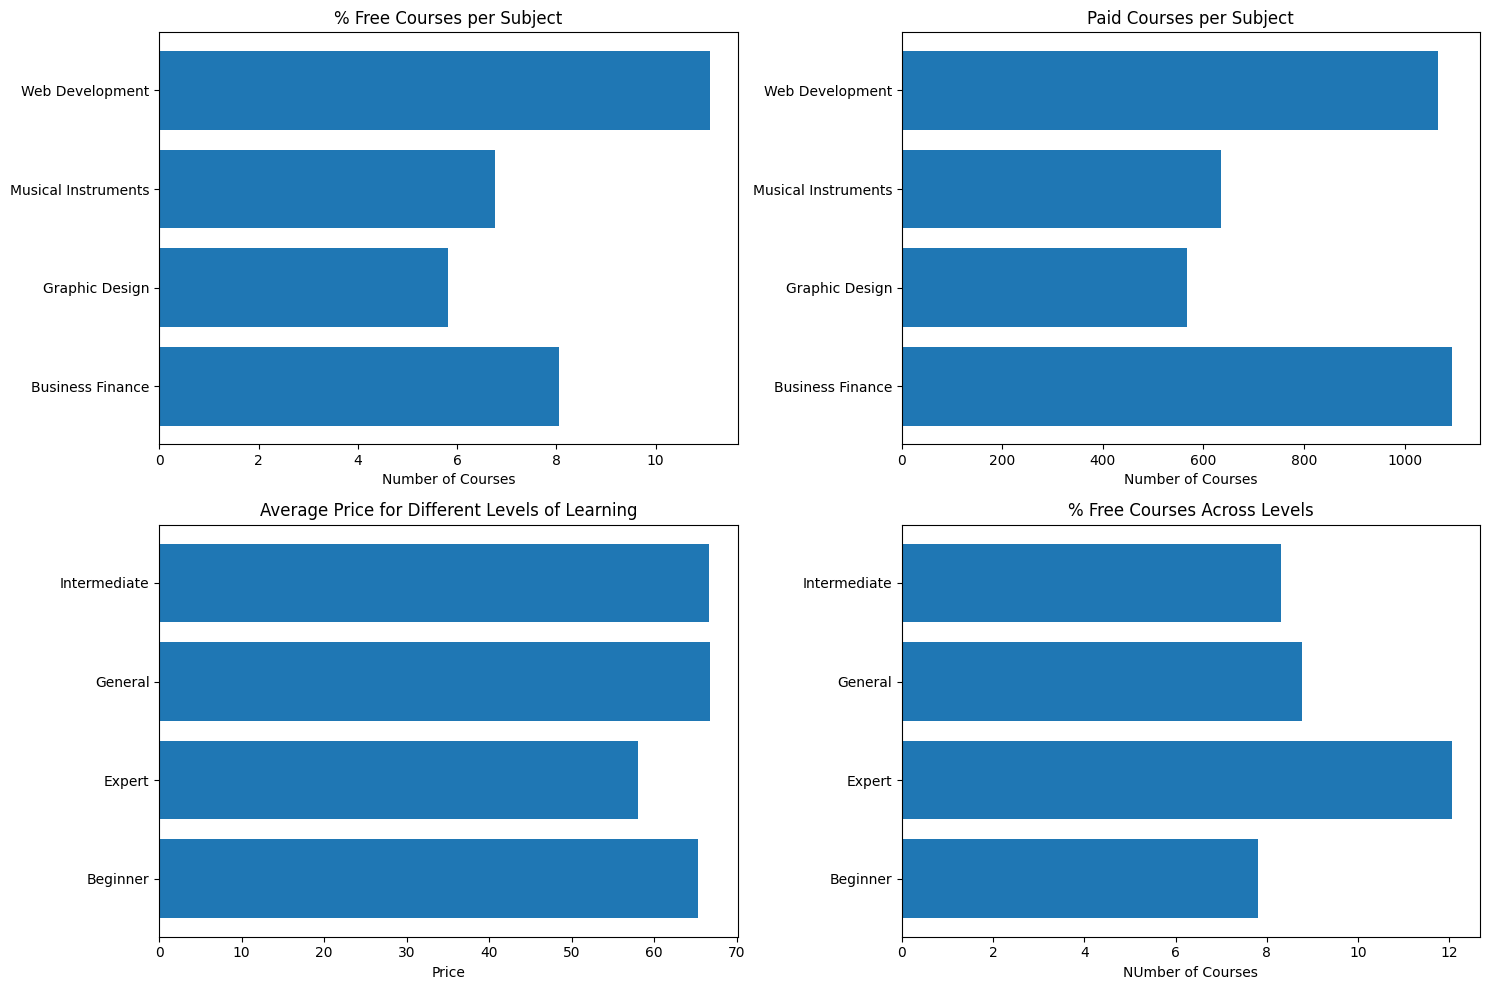

In [ ]:
#revenue generation by subject and by course
fig, ((ax0,ax1), (ax2,ax3)) = plt.subplots(2,2 ,figsize=(15,10))

df_free = df.query('price == 0')
(ax0.barh(df_free.groupby('subject')['course_title'].count().index,
          100*df_free.groupby('subject')['course_title'].count()/
          df.groupby('subject')['course_title'].count()))
ax0.set_title('% Free Courses per Subject')
ax0.set_xlabel('Number of Courses')

df_paid = df.query('price != 0')
ax1.barh(df_paid.groupby('subject')['course_title'].count().index, df_paid.groupby('subject')['course_title'].count())
ax1.set_title('Paid Courses per Subject')
ax1.set_xlabel('Number of Courses')

ax2.barh(df.groupby('level')['price'].mean().index, df.groupby('level')['price'].mean())
ax2.set_title('Average Price for Different Levels of Learning')
ax2.set_xlabel('Price')

df_free = df.query('price == 0')
(ax3.barh(df_free.groupby('level')['course_title'].count().index,
          100*df_free.groupby('level')['course_title'].count()/
          df.groupby('level')['course_title'].count()))
ax3.set_title('% Free Courses Across Levels')
ax3.set_xlabel('NUmber of Courses')

plt.tight_layout()
plt.show()

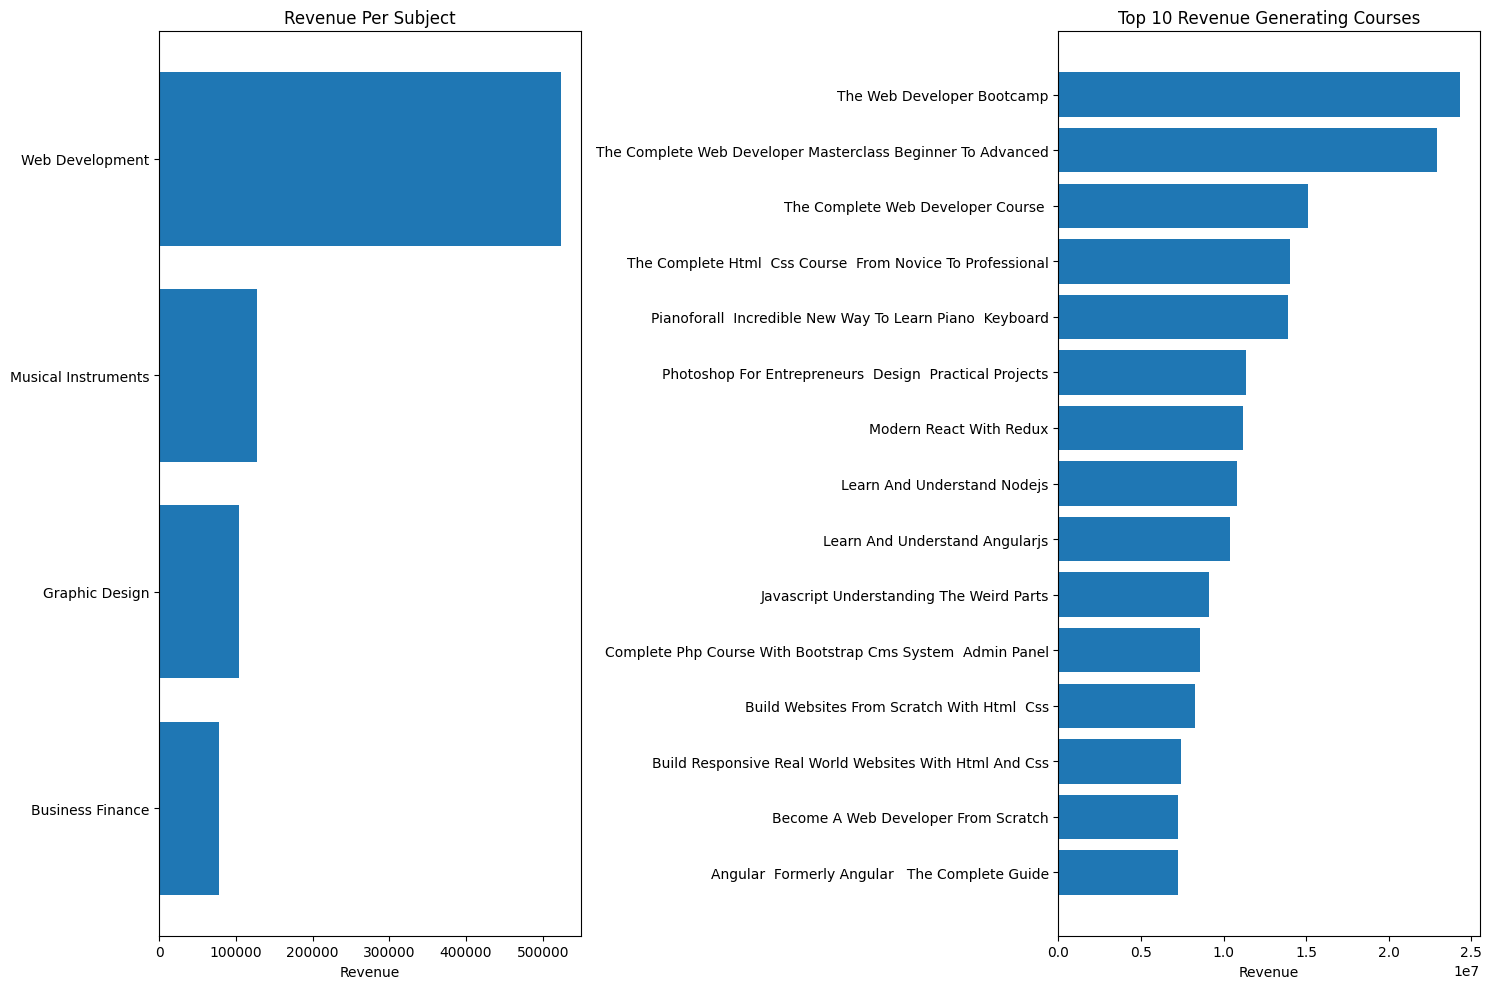

In [ ]:
#revenue generation by subject and by course
fig, ((ax0), (ax1)) = plt.subplots(1, 2 ,figsize=(15,10))

(ax0.barh(df.groupby('subject')['revenue'].sum().index, sorted(df.groupby('subject')['revenue'].mean())))
ax0.set_title('Revenue Per Subject')
ax0.set_xlabel('Revenue')


#sort the dataframe by revenue generated and courses and plot top 15
df_rev = df[['course_title', 'revenue']].sort_values('revenue', ascending=False).head(15)
(ax1.barh(df_rev.head(15).groupby('course_title')['revenue'].sum().index,
          sorted(df_rev.head(15).groupby('course_title')['revenue'].sum())))
ax1.set_title('Top 10 Revenue Generating Courses')
ax1.set_xlabel('Revenue')

plt.tight_layout()
plt.show()

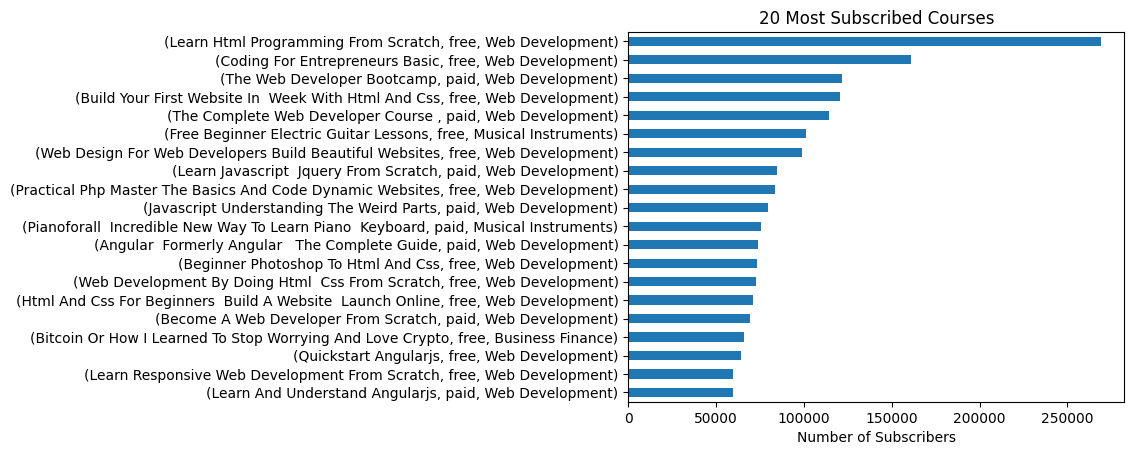

In [ ]:
#plot of the courses by number of subscribers
df_sub = df.sort_values('num_subscribers', ascending=False).head(20)
df_sub.groupby(['course_title', 'price_group','subject'])['num_subscribers'].sum().sort_values().plot(kind='barh')
plt.title('20 Most Subscribed Courses')
plt.ylabel('')
plt.xlabel('Number of Subscribers')
plt.rcParams["figure.figsize"] = (10, 12)
plt.show()

<ipython-input-25-7cbe3387a623>:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



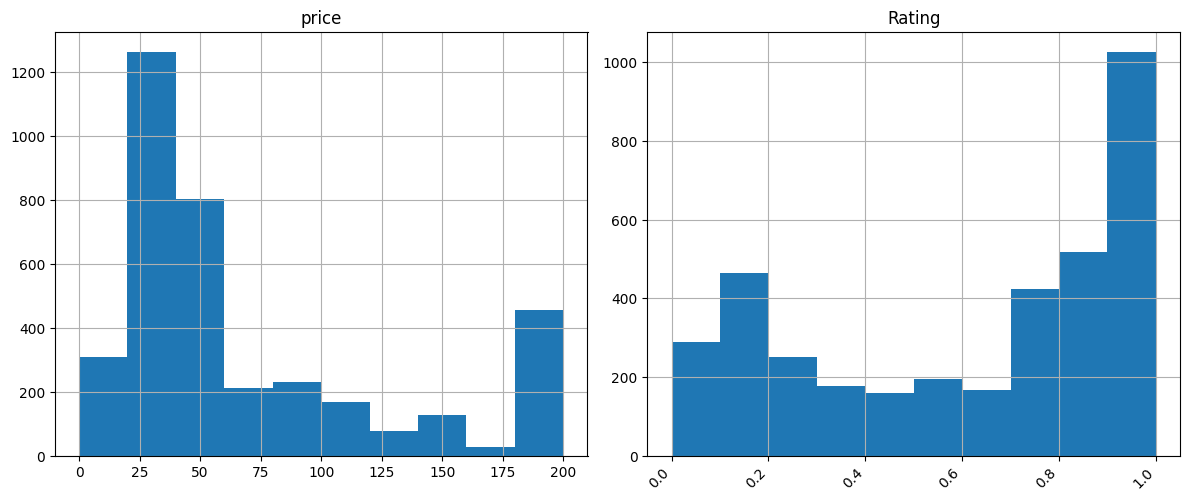

In [ ]:
#distribution chart of selected attributes
fig = plt.figure(figsize = (12,5))
ax = fig.gca()

df[['price', 'Rating']].hist(ax = ax)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
warnings.filterwarnings("ignore")

plt.show()

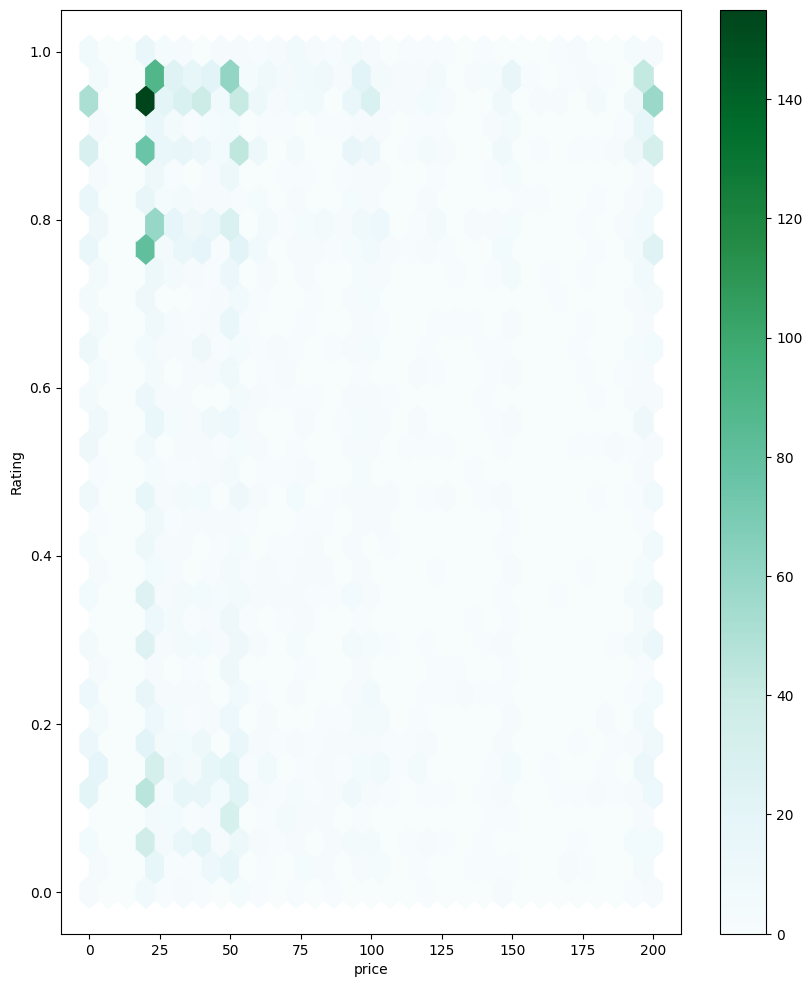

In [ ]:
df.plot.hexbin(x='price', y='Rating', gridsize=30)
plt.show()

subject
Business Finance       68.694374
Graphic Design         57.890365
Musical Instruments    49.558824
Web Development        77.035029
Name: price, dtype: float64


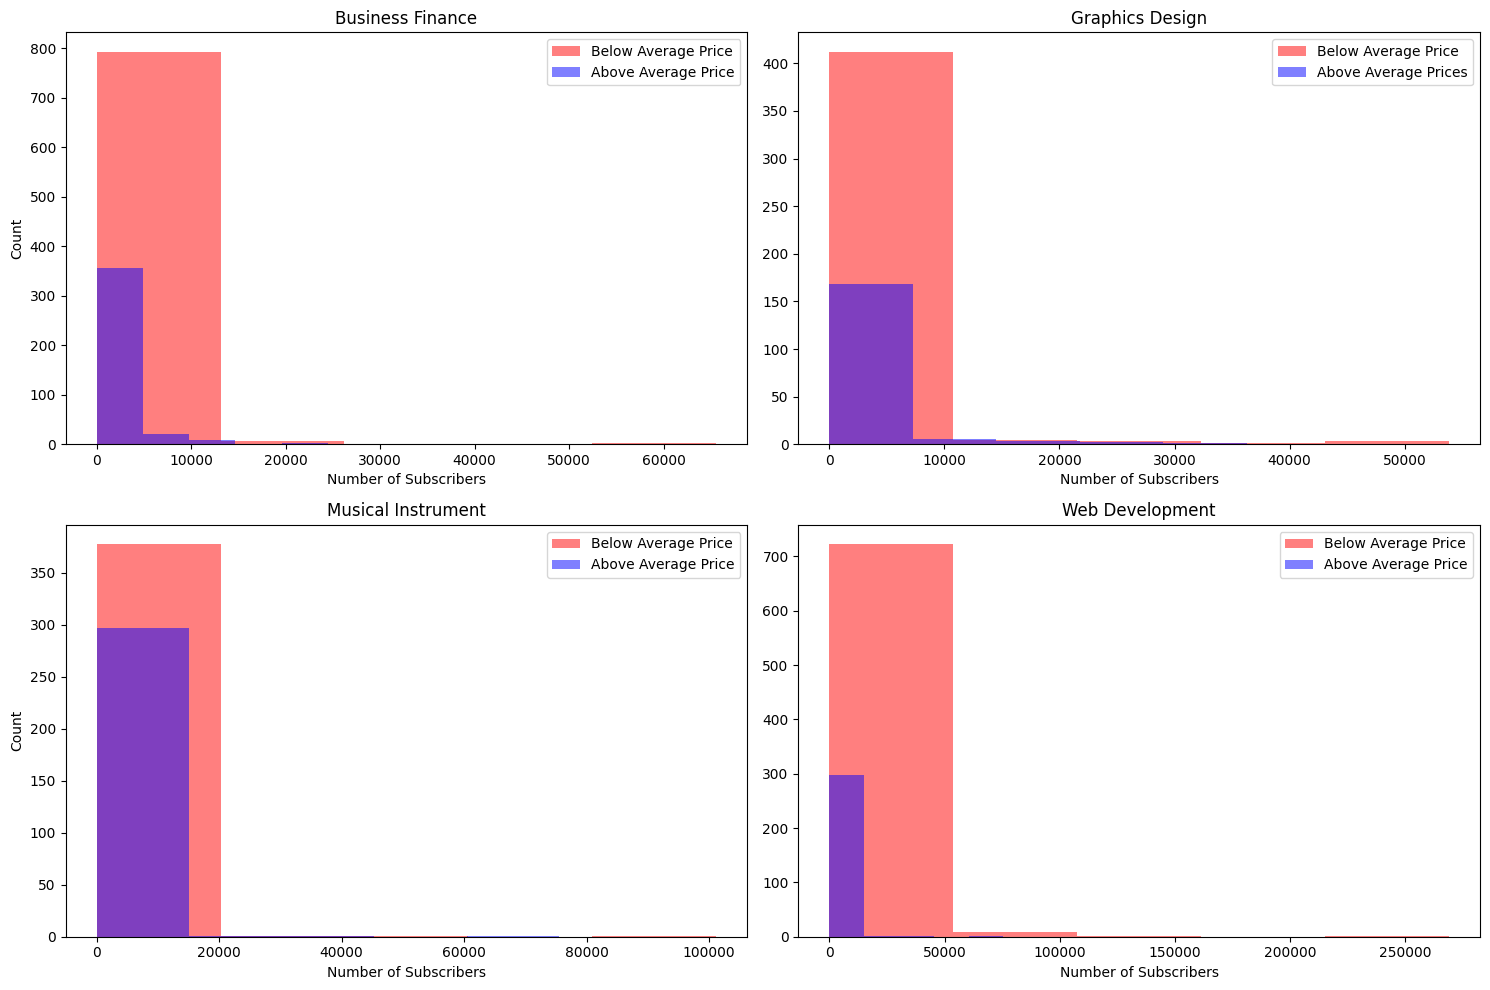

In [ ]:
#average price of course per category
print(df.groupby('subject')['price'].mean())

#use power query to categorize dataset based on the average price
below_biz = df_biz.query('price < 68.694374')
above_biz = df_biz.query('price >= 68.694374')

below_gfx = df_gfx.query('price < 57.890365')
above_gfx = df_gfx.query('price >= 57.890365')

below_mus = df_mus.query('price < 49.558824')
above_mus = df_mus.query('price >= 49.558824')

below_dev = df_dev.query('price < 77.036575')
above_dev = df_dev.query('price >= 77.036575')

#use this to compare number of courses, rating etc below and above the median(or average) price
#double hist plot function

fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

ax0.hist(below_biz.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax0.hist(above_biz.num_subscribers, 5, color ='b', alpha = 0.5, label='Above Average Price')
ax0.legend(prop={'size': 10})
ax0.set_xlabel('Number of Subscribers')
ax0.set_ylabel('Count')
ax0.set_title('Business Finance')

ax1.hist(below_gfx.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax1.hist(above_gfx.num_subscribers, 5, color ='b', alpha = 0.5, label='Above Average Prices')
ax1.legend(prop={'size': 10})
ax1.set_xlabel('Number of Subscribers')
ax1.set_title('Graphics Design')

ax2.hist(below_mus.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax2.hist(above_mus.num_subscribers,5, color ='b', alpha = 0.5, label='Above Average Price')
ax2.legend(prop={'size': 10})
ax2.set_xlabel('Number of Subscribers')
ax2.set_ylabel('Count')
ax2.set_title('Musical Instrument')

ax3.hist(below_dev.num_subscribers, 5, color ='r', alpha = 0.5, label='Below Average Price')
ax3.hist(above_mus.num_subscribers,5, color ='b', alpha = 0.5, label='Above Average Price')
ax3.legend(prop={'size': 10})
ax3.set_xlabel('Number of Subscribers')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

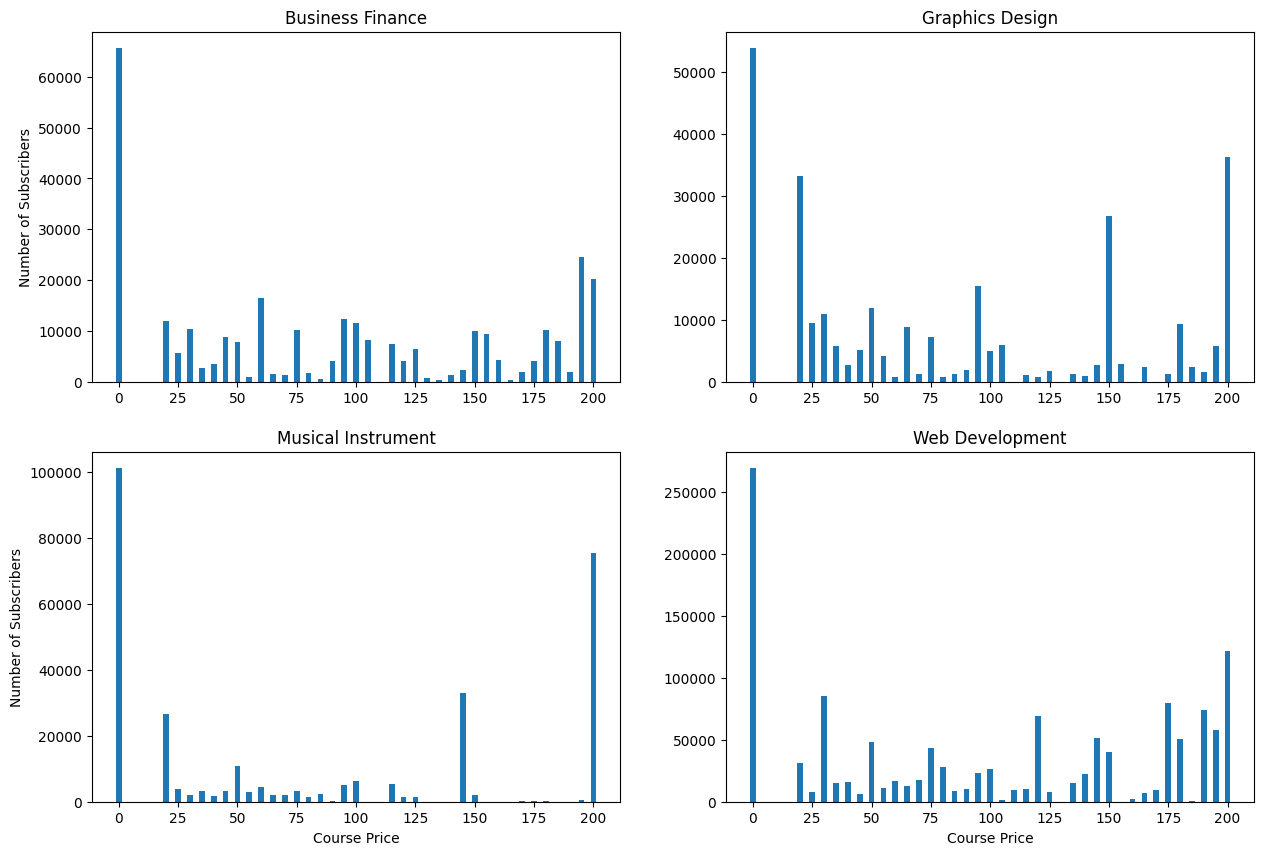

In [ ]:
#course price versus number of subscribers
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

ax0.bar(df_biz.price, df_biz['num_subscribers'], width=2.4)
ax0.set_title('Business Finance')
ax0.set_ylabel('Number of Subscribers')

ax1.bar(df_gfx.price, df_gfx.num_subscribers, width=2.4)
ax1.set_title('Graphics Design')

ax2.bar(df_mus.price, df_mus.num_subscribers, width=2.4)
ax2.set_title('Musical Instrument')
ax2.set_xlabel('Course Price')
ax2.set_ylabel('Number of Subscribers')

ax3.bar(df_dev.price, df_dev.num_subscribers, width=2.4)
ax3.set_title('Web Development')
ax3.set_xlabel('Course Price')

plt.show()

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


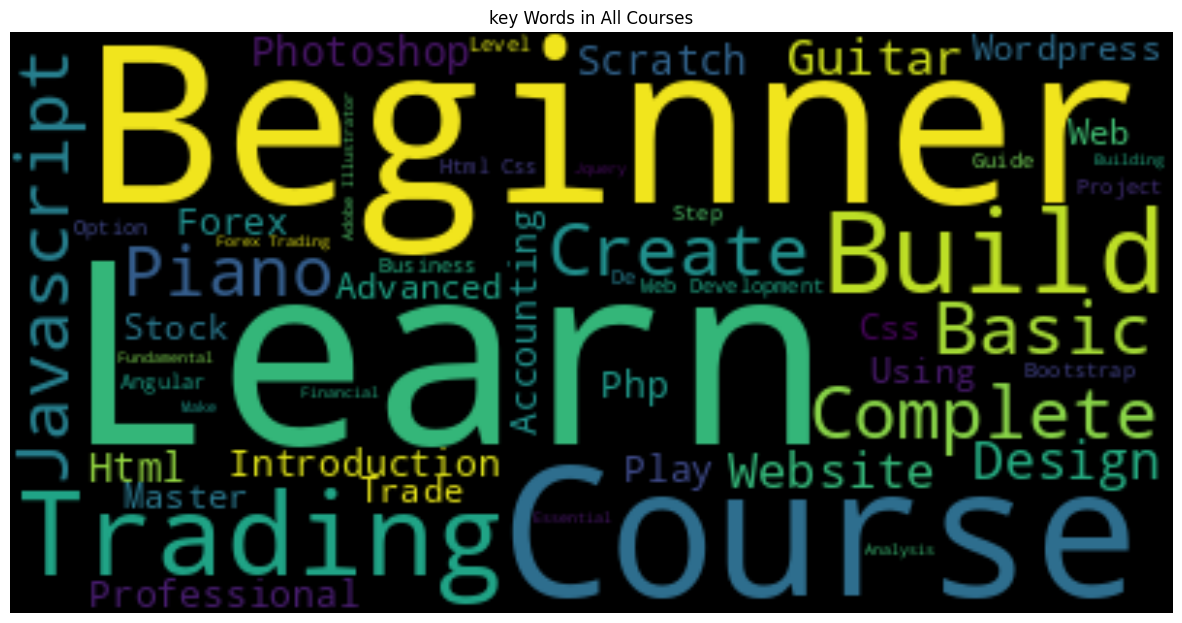

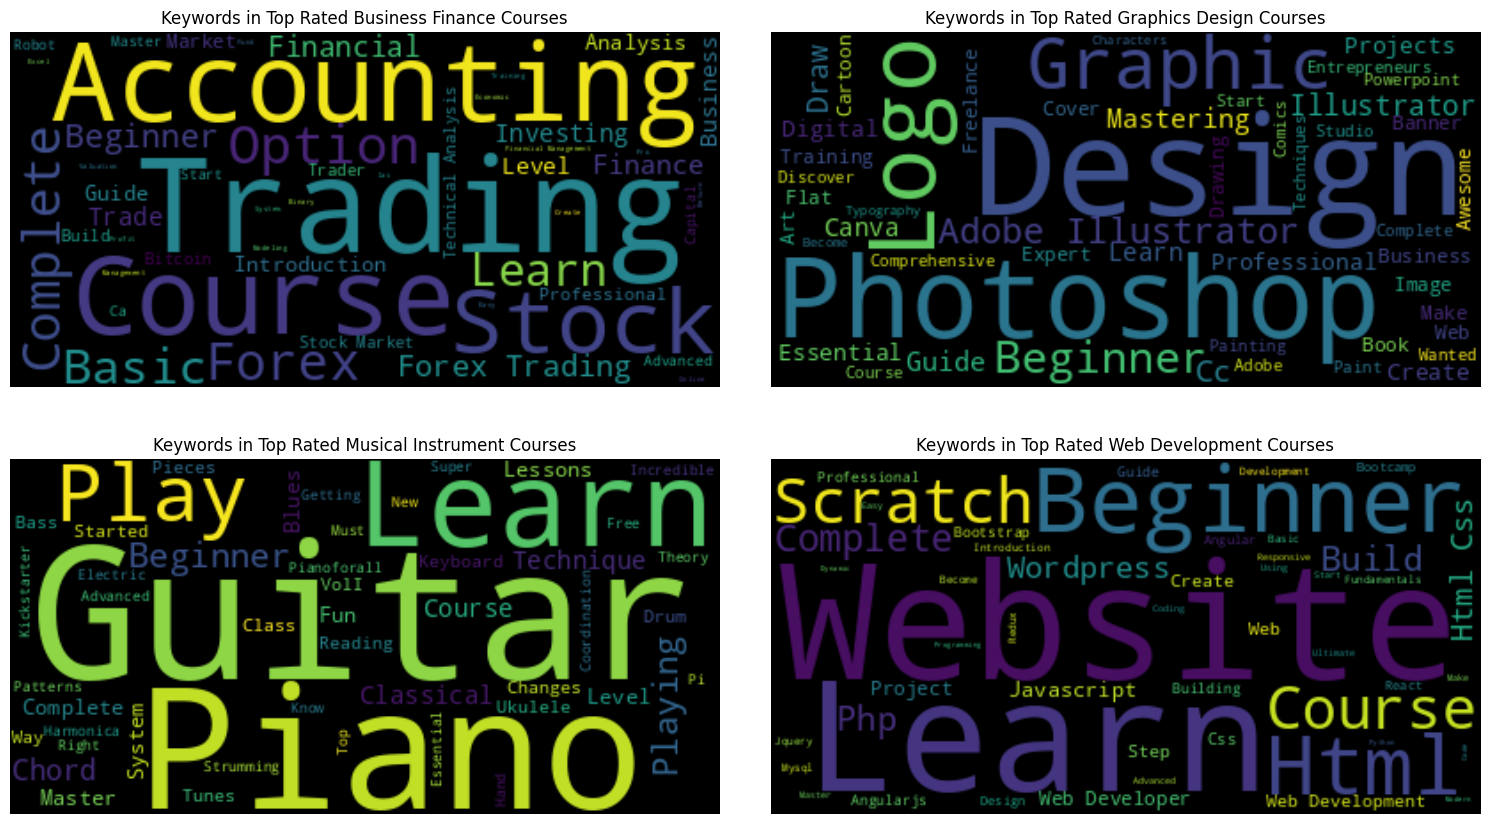

In [ ]:
!pip install nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
snowball = SnowballStemmer(language = 'english')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')

#instantiate lemmatize; change words in past to present, third person to first person
wn = WordNetLemmatizer()

stopword = set(stopwords.words('english'))

def word_join(text):
    text = (' '.join([word for word in text.split(' ') if word not in stopword]))
    text = ' '.join([wn.lemmatize(word, pos='v') for word in text.split(' ')])
    return text


text = ' '.join(word for word in df['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('key Words in All Courses')
plt.axis('off')
plt.show()

#plot words for the top rated courses
fig, ((ax0, ax1), (ax2, ax3 )) = plt.subplots(2,2 ,figsize=(15,10))

df_bizt = df_biz.query('star_rating >= 4 & num_subscribers > 1569') #above average number of subscribers
text = ' '.join(word for word in df_bizt['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax0.imshow(wordcloud, interpolation='bilinear')
ax0.set_title('Keywords in Top Rated Business Finance Courses')
fig.tight_layout()
ax0.axis("off")

df_gfxt = df_gfx.query('star_rating >= 4 & num_subscribers > 1766') #above average number of subscribers
text = ' '.join(word for word in df_gfxt['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('Keywords in Top Rated Graphics Design Courses')
fig.tight_layout()
ax1.axis("off")

df_must = df_mus.query('star_rating >= 4 & num_subscribers > 1245') #above average number of subscribers
text = ' '.join(word for word in df_must['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.set_title('Keywords in Top Rated Musical Instrument Courses')
fig.tight_layout()
ax2.axis("off")

df_devt = df_dev.query('star_rating >= 4 & num_subscribers > 6635') #above average number of subscribers
text = ' '.join(word for word in df_devt['course_title'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.set_title('Keywords in Top Rated Web Development Courses')
fig.tight_layout()
plt.axis("off")
warnings.filterwarnings("ignore")
plt.show()

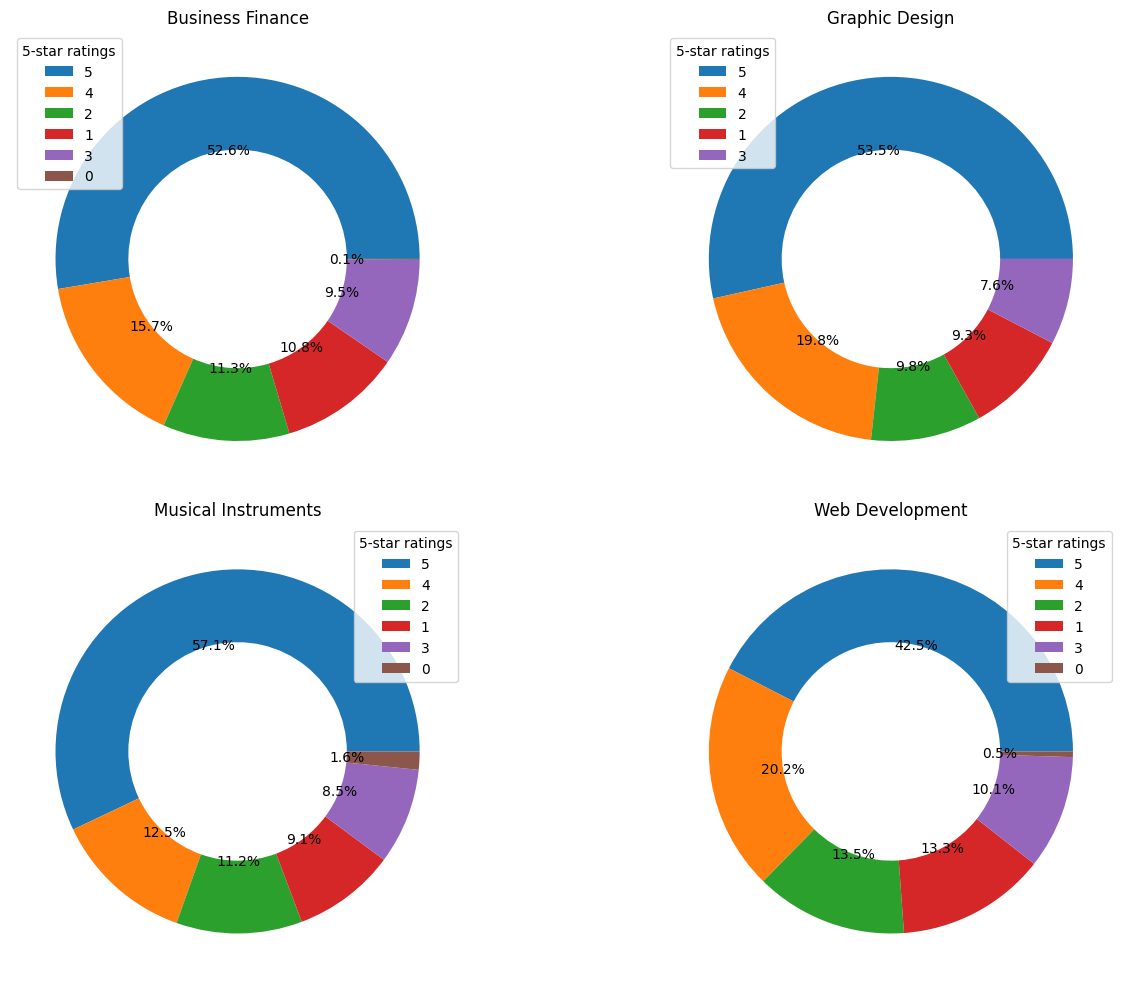

In [ ]:
#pieplot for the different courses
# use 5 for number of bins
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2 ,figsize=(15,10))

labels = [0,1,2,3,4,5]

ax0.pie(df_biz['star_rating'].value_counts(), autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax0.legend(df_biz['star_rating'].value_counts().index,title = '5-star ratings')
ax0.set_title('Business Finance')

ax1.pie(df_gfx['star_rating'].value_counts(), autopct='%1.1f%%',   wedgeprops=dict(width=.4))
ax1.legend(df_biz['star_rating'].value_counts().index,title = '5-star ratings')
ax1.set_title('Graphic Design')

ax2.pie(df_mus['star_rating'].value_counts(), autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax2.legend(df_biz['star_rating'].value_counts().index,title = '5-star ratings')
ax2.set_title('Musical Instruments')

ax3.pie(df_dev['star_rating'].value_counts(), autopct='%1.1f%%',  wedgeprops=dict(width=.4))
ax3.legend(df_biz['star_rating'].value_counts().index,title = '5-star ratings')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

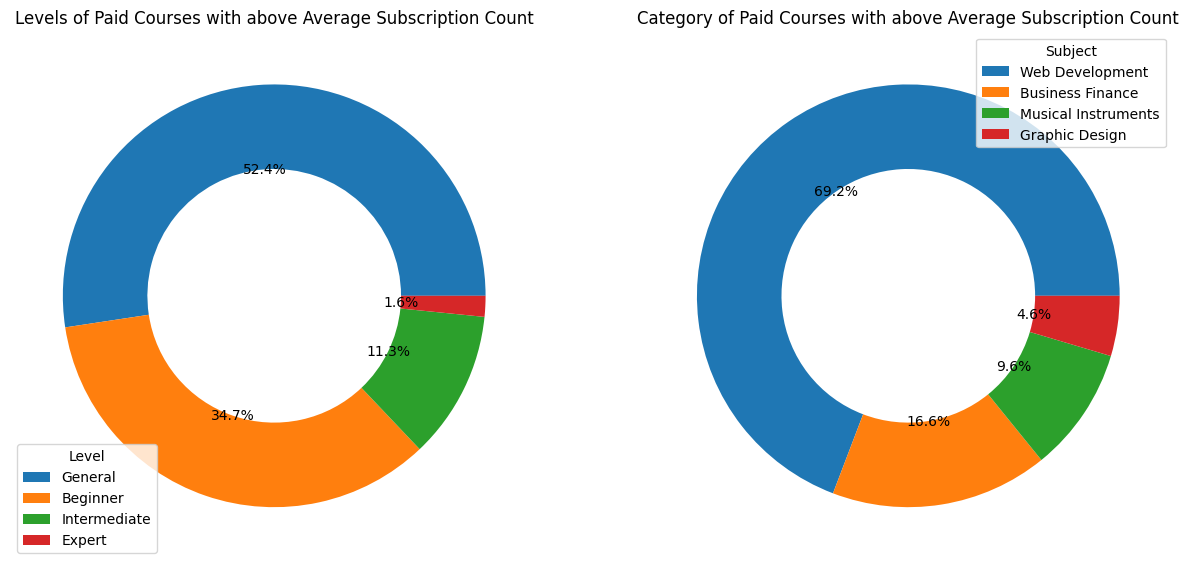

In [ ]:
fig, ((ax0), (ax1)) = plt.subplots(1,2 ,figsize=(15,10))

#paid courses with above average subscription
subject = df[(df['num_subscribers']>3199) & (df['price_group'] != 'free')]['level'].value_counts()
ax0.pie(subject, autopct='%1.1f%%',   wedgeprops=dict(width=.4))
ax0.legend(df['level'].value_counts().index, title = 'Level')
ax0.set_title('Levels of Paid Courses with above Average Subscription Count')

#paid courses with above average subscription
subject1 = df[(df['num_subscribers']>3199) & (df['price_group'] != 'free')]['subject'].value_counts()
ax1.pie(subject1, autopct='%1.1f%%',   wedgeprops=dict(width=.4))
ax1.legend(df['subject'].value_counts().index, title = 'Subject')
ax1.set_title('Category of Paid Courses with above Average Subscription Count')

plt.show()

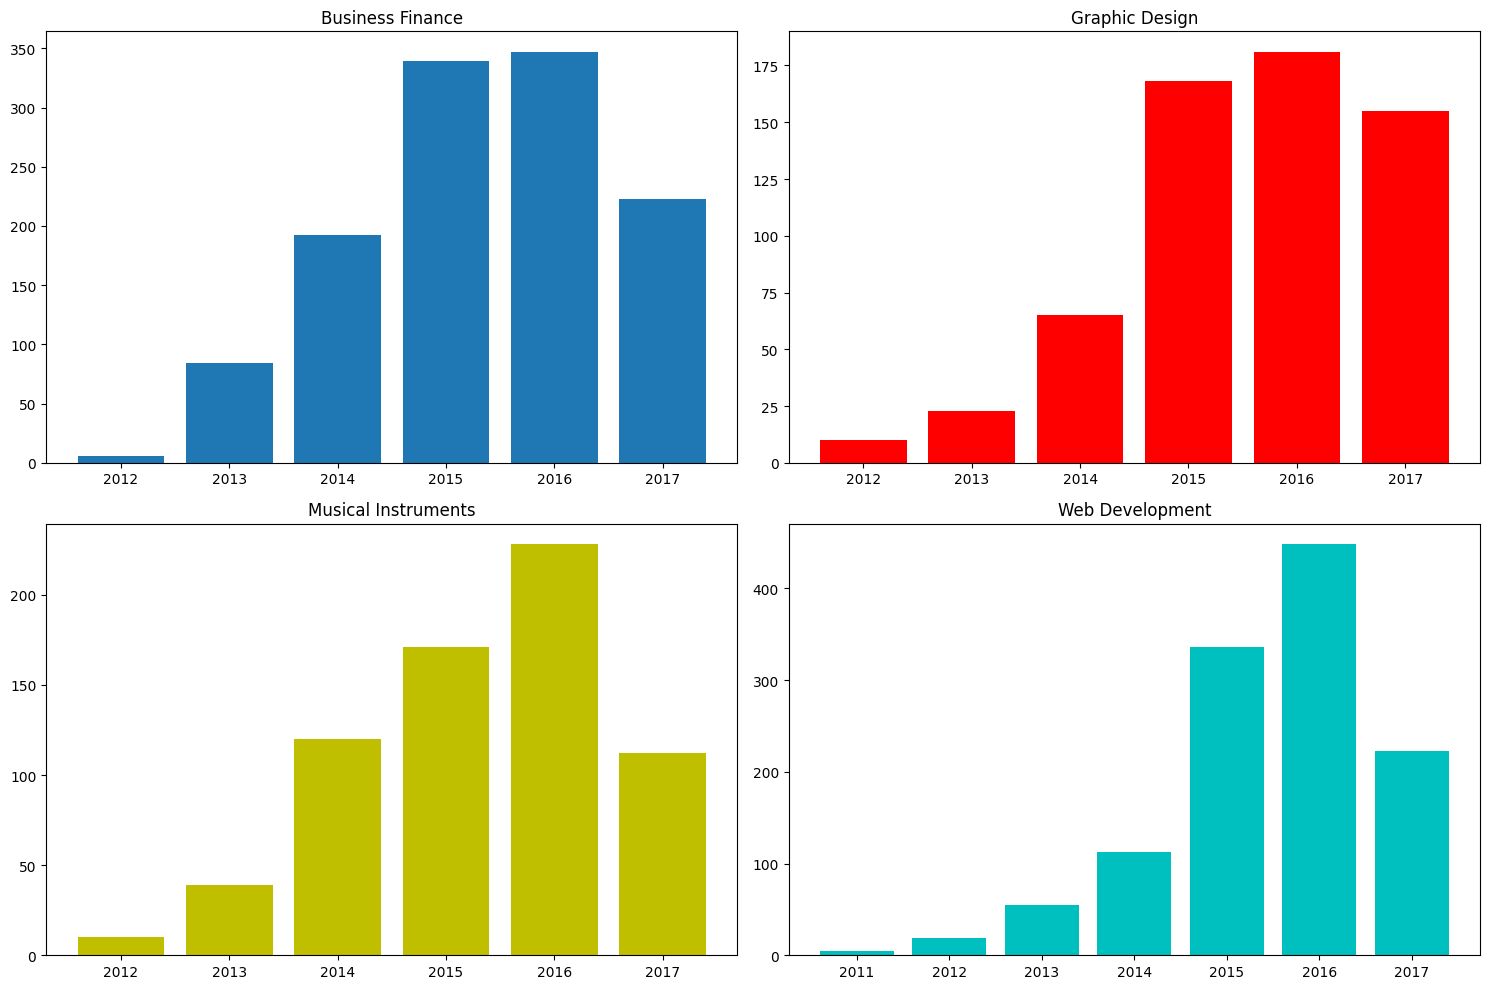

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2 ,figsize=(15,10))

labels = [0,1,2,3,4,5]

ax0.bar(df_biz.year.value_counts().index,df_biz.year.value_counts().values)
ax0.set_title('Business Finance')

ax1.bar(df_gfx.year.value_counts().index,df_gfx.year.value_counts().values,color='r')
ax1.set_title('Graphic Design')

ax2.bar(df_mus.year.value_counts().index,df_mus.year.value_counts().values,color='y')
ax2.set_title('Musical Instruments')

ax3.bar(df_dev.year.value_counts().index,df_dev.year.value_counts().values, color='c')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

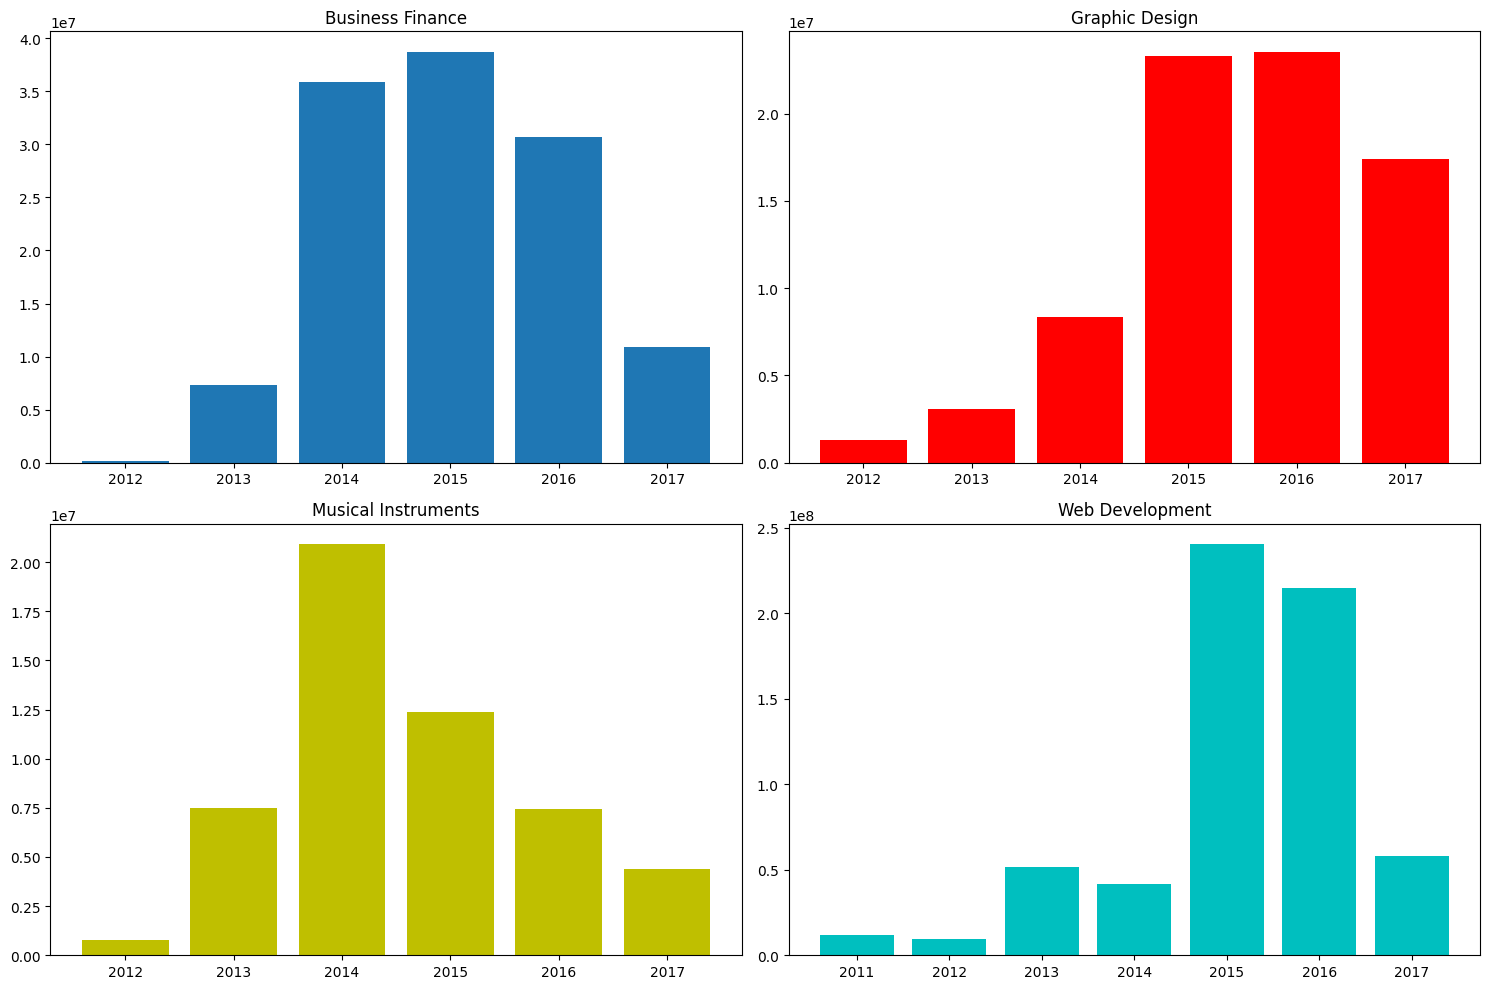

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2 ,figsize=(15,10))

labels = [0,1,2,3,4,5]

ax0.bar(df_biz.groupby('year')['revenue'].sum().index, df_biz.groupby('year')['revenue'].sum())
ax0.set_title('Business Finance')

ax1.bar(df_gfx.groupby('year')['revenue'].sum().index, df_gfx.groupby('year')['revenue'].sum(), color='r')
ax1.set_title('Graphic Design')

ax2.bar(df_mus.groupby('year')['revenue'].sum().index, df_mus.groupby('year')['revenue'].sum(),color='y')
ax2.set_title('Musical Instruments')

ax3.bar(df_dev.groupby('year')['revenue'].sum().index, df_dev.groupby('year')['revenue'].sum(), color='c')
ax3.set_title('Web Development')

fig.tight_layout()
plt.show()

**Comments**
The dataset is limited to only four subject areas while leaving out a ton of interesting areas including Data Science, Cyber Security, Cloud Computing, Digital Marketing.
The dataset is not updated to the current year, 2022. It would have been nice to see how digital learning grew in the Covid-19 era.
There are no demographic data on the subscribers and the duration of their learning of the chosen subject.
The rating of the courses didnt provide details of the comments made by the subscribers.
It was not expressely stated what the unit of the course duration was - whether hours or minutes.
It was not explained what the scale of the Rating was; does a rating of 0.0 mean there was no rating at all or the course received the least score.
There is no data on the content creators; it would have been great to know which tutors make the most subscribed and best rated contents.

**Conclusions**
Web Development and Graphics Designs have the highest and lowest number of published courses respectively.
Subscribers are more interested in Web Development courses and least in Musical Instruments courses.
Graphics Design courses followed by Business Finance received the best ratings.
Web Development courses are more expensive, attractive more subscribers; hence generate the highest revenue.
The % of the courses that are free are more in expert level.
For courses with high rating and subscriptions, they are courses on Accounting, Forex, Stock in Business Finance; Photoshop, Adobe Illustrator in Graphics Design; Piano and Guitar in Musical Instruments and HTML, CSS, building a Website in Web Development.
The courses received high ratings across board.
The year 2016 has highest number of courses published across the different subjects.
For revenue generation, 2014 was the big year for Musical Instruments, 2015 for Business Finance and Web Development while Graphics Design made the most revenue in 2016.